## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv")
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [3]:
# пропусков в данных нет
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [4]:
data.apply(lambda col: col.unique())

status                     [no checking account, ... < 0 DM, ... >= 200 D...
duration                   [18, 9, 12, 10, 8, 6, 24, 11, 30, 48, 36, 15, ...
credit_history             [all credits at this bank paid back duly, no c...
purpose                    [car (used), others, retraining, furniture/equ...
amount                     [1049, 2799, 841, 2122, 2171, 2241, 3398, 1361...
savings                    [unknown/no savings account, ... <  100 DM, 10...
employment_duration        [< 1 yr, 1 <= ... < 4 yrs, 4 <= ... < 7 yrs, u...
installment_rate               [< 20, 25 <= ... < 35, 20 <= ... < 25, >= 35]
personal_status_sex        [female : non-single or male : single, male : ...
other_debtors                                [none, guarantor, co-applicant]
present_residence          [>= 7 yrs, 1 <= ... < 4 yrs, 4 <= ... < 7 yrs,...
property                   [car or other, unknown / no property, building...
age                        [21, 36, 23, 39, 38, 48, 40, 65, 24, 31, 44, 2...

In [5]:
# порядковый
data["status"].unique()

array(['no checking account', '... < 0 DM',
       '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'],
      dtype=object)

In [6]:
# количественный
data["duration"].unique()[:10]

array([18,  9, 12, 10,  8,  6, 24, 11, 30, 48])

In [7]:
# категориальный
data["credit_history"].unique()

array(['all credits at this bank paid back duly',
       'no credits taken/all credits paid back duly',
       'existing credits paid back duly till now',
       'delay in paying off in the past',
       'critical account/other credits elsewhere'], dtype=object)

In [8]:
# категориальный
data["purpose"].unique()

array(['car (used)', 'others', 'retraining', 'furniture/equipment',
       'car (new)', 'business', 'domestic appliances', 'radio/television',
       'repairs', 'vacation'], dtype=object)

In [9]:
# количественный
data["amount"].unique()[:10]

array([1049, 2799,  841, 2122, 2171, 2241, 3398, 1361, 1098, 3758])

In [10]:
# порядковый
data["savings"].unique()

array(['unknown/no savings account', '... <  100 DM',
       '100 <= ... <  500 DM', '... >= 1000 DM', '500 <= ... < 1000 DM'],
      dtype=object)

In [11]:
# порядковый
data["employment_duration"].unique()

array(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', 'unemployed',
       '>= 7 yrs'], dtype=object)

In [12]:
# порядковый
data["installment_rate"].unique()

array(['< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35'], dtype=object)

In [13]:
# категориальный
data["personal_status_sex"].unique()

array(['female : non-single or male : single', 'male : married/widowed',
       'female : single', 'male : divorced/separated'], dtype=object)

In [14]:
# категориальный
data["other_debtors"].unique()

array(['none', 'guarantor', 'co-applicant'], dtype=object)

In [15]:
# порядковый
data["present_residence"].unique()

array(['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'],
      dtype=object)

In [16]:
# категориальный
data["property"].unique()

array(['car or other', 'unknown / no property',
       'building soc. savings agr./life insurance', 'real estate'],
      dtype=object)

In [17]:
# количественный
data["age"].unique()[:10]

array([21, 36, 23, 39, 38, 48, 40, 65, 24, 31])

In [18]:
# категориальный
data["other_installment_plans"].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [19]:
# категориальный
data["housing"].unique()

array(['for free', 'rent', 'own'], dtype=object)

In [20]:
# порядковый
data["number_credits"].unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [21]:
# порядковый
data["job"].unique()

array(['skilled employee/official', 'unskilled - resident',
       'unemployed/unskilled - non-resident',
       'manager/self-empl./highly qualif. employee'], dtype=object)

In [22]:
# бинарный
data["people_liable"].unique()

array(['0 to 2', '3 or more'], dtype=object)

In [23]:
# бинарный
data["telephone"].unique()

array(['no', 'yes (under customer name)'], dtype=object)

In [24]:
# бинарный
data["foreign_worker"].unique()

array(['no', 'yes'], dtype=object)

In [25]:
# бинарный
data["credit_risk"].unique()

array(['good', 'bad'], dtype=object)

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [26]:
data.groupby('purpose')['amount', ].mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [27]:
# процент клиентов моложе 30 лет, снимающих жилье
print(data.loc[(data["age"] < 30) & (data["housing"] == 'rent')].shape[0] * 100 / data.loc[(data["age"] < 30)].shape[0], end='%')

66.66666666666667%

In [28]:
# процент клиентов старше 40 лет, снимающих жилье
print(data.loc[(data["age"] > 40) & (data["housing"] == 'rent')].shape[0] * 100 / data.loc[(data["age"] > 40)].shape[0], end='%')

68.01470588235294%

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [29]:
data.loc[(data["foreign_worker"] == 'yes') & ((data["number_credits"] == '4-5') | (data["number_credits"] == '>=6'))].shape[0]

1

### Задание 6 (1 балл)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

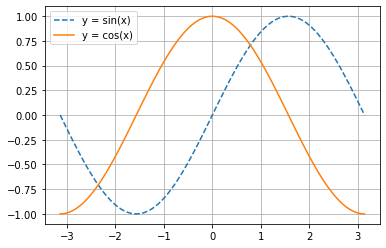

In [31]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, linestyle='dashed', label='y = sin(x)')
plt.plot(x, y2, label='y = cos(x)')
plt.legend()
plt.grid(True)

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

In [32]:
# your code here

### Задание 8  (0.5 балла)

In [33]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='count'>

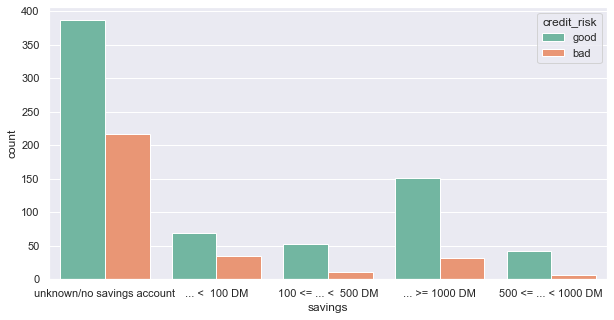

In [34]:
sns.set(rc = {'figure.figsize':(10,5)})
sns.countplot(data=data, x='savings', hue='credit_risk', palette='Set2')

##### по всем размерам сберегательного счета количество положительных кейсов преобладает

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

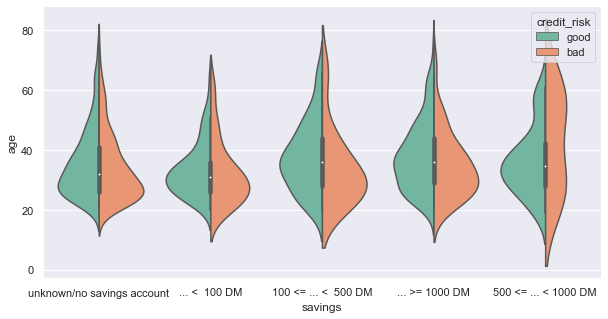

In [35]:
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', palette='Set2', split='True')

##### большая часть клиентов в возрасте от 20 до 40 лет

<AxesSubplot:xlabel='savings', ylabel='age'>

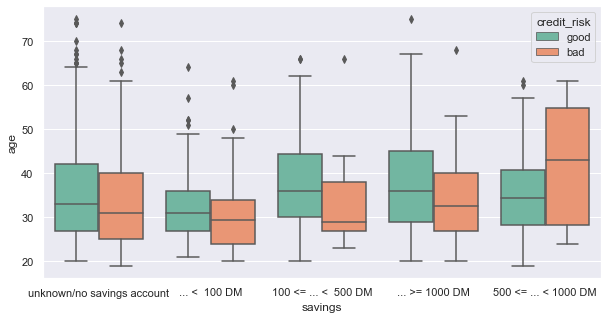

In [36]:
sns.boxplot(data=data, x='savings', y='age', hue='credit_risk', palette='Set2')

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

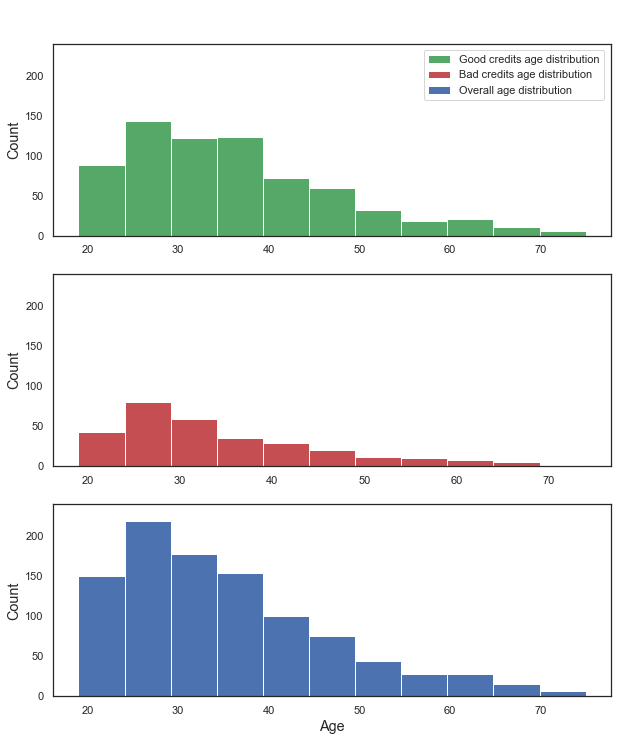

In [37]:
sns.set_theme(style="white")

fig = plt.figure(figsize=(10,12))
axis = fig.subplots(3)

axis[0].hist(data[data['credit_risk'] == 'good']['age'], bins = 11, color='g', label='Good credits age distribution')
axis[0].set_ylabel('Count', fontsize='large')
axis[0].set_ylim(0, 240)

axis[1].hist(data[data['credit_risk'] == 'bad']['age'], bins = 11, color='r', label='Bad credits age distribution')
axis[1].set_ylabel('Count', fontsize='large')
axis[1].set_ylim(0, 240)

axis[2].hist(data['age'], bins = 11, color='b', label='Overall age distribution')
axis[2].set_ylabel('Count', fontsize='large')
axis[2].set_xlabel('Age', fontsize='large')
axis[2].set_ylim(0, 240)

fig.legend(loc=(0.67, 0.8648))

plt.show()

##### можно заметить, что количество клиентов из обеих категорий напрямую коррелирует с возрастом

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0, 0.5, 'Duration')

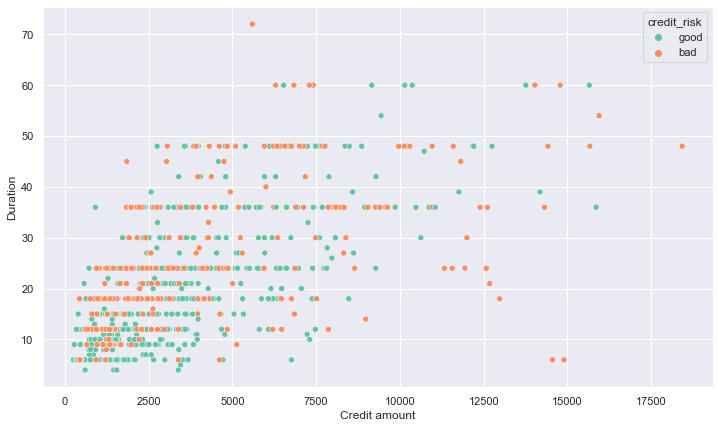

In [38]:
sns.set_theme(context=None, style=None)
sns.set(rc = {'figure.figsize':(12,7)})
sns.scatterplot(x='amount', y='duration', data=data, hue='credit_risk', palette='Set2')
plt.xlabel('Credit amount')
plt.ylabel('Duration')

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

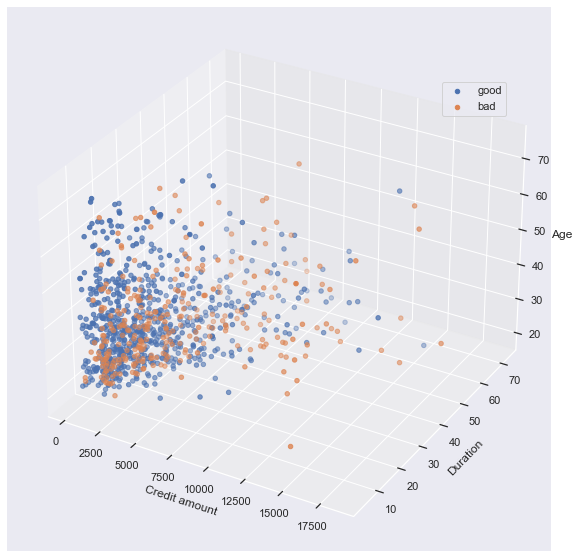

In [39]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

for s in data['credit_risk'].unique():
    ax.scatter(data.amount[data.credit_risk == s],data.duration[data.credit_risk == s],data.age[data.credit_risk == s],label=s)

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

ax.legend(loc=(0.8, 0.8))

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [40]:
cleanData = data.drop(['purpose','personal_status_sex','other_debtors','property','other_installment_plans','housing'], axis=1)
categories = cleanData.select_dtypes(include='object').columns


for elem in categories:
    cleanData[elem] = cleanData[elem].astype('category').cat.codes
    
cleanData.head()

,status,duration,credit_history,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,0,1049,4,2,2,3,21,0,1,0,0,0,1
1,3,9,0,2799,4,0,1,0,36,1,1,1,0,0,1
2,0,12,4,841,0,1,1,3,23,0,3,0,0,0,1
3,3,12,0,2122,4,0,0,0,39,1,3,1,0,1,1
4,3,12,0,2171,4,0,2,3,38,1,3,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [65]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

Y_data = cleanData['credit_risk'].values
X_data = cleanData.drop(['credit_risk'], axis=1).values
print(X_data)
X_data = scaler.fit_transform(X_data)

[[ 3 18  0 ...  0  0  0]
 [ 3  9  0 ...  1  0  0]
 [ 0 12  4 ...  0  0  0]
 ...
 [ 1 21  0 ...  0  1  0]
 [ 0 12  4 ...  0  1  0]
 [ 3 30  4 ...  0  0  0]]


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

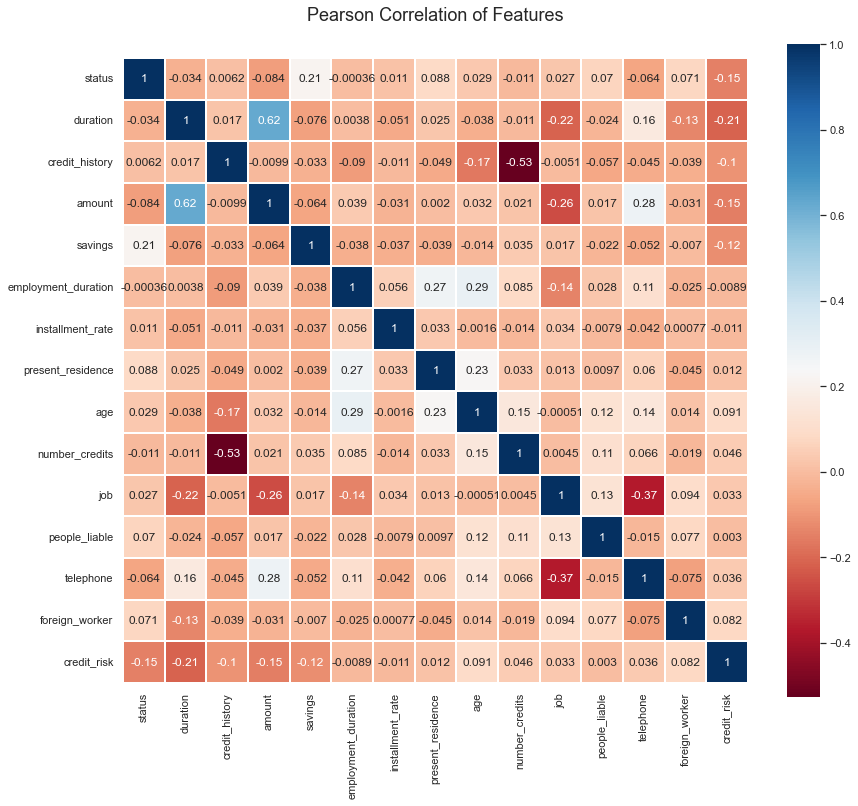

In [66]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(cleanData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [69]:
def predict(Xtest: np.array) -> np.array:
    return (Xtest.mean(axis=1) < np.sqrt(Xtest.mean())) * 1


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# X = data.drop('credit_risk', 1).values
# y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.25, random_state=10)
((((X_train.mean(axis=1) > X_train.mean()) & (y_train == 0)) | ((X_train.mean(axis=1) < X_train.mean()) & (y_train == 1))) * 1).mean()

accuracy_score(y_test, predict(X_test))

0.632